In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.metrics import classification_report
from scipy import stats
from sklearn import metrics

In [5]:
d1=pd.read_csv("../data/Crop_recommendation.csv")


In [6]:
cropnew=d1

In [7]:
pd.set_option('display.max_rows', None)
cropnew.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
cropnew.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [27]:
def IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bridge = Q1 - 1.5 * IQR
    upper_bridge = Q3 + 1.5 * IQR
    df.loc[df[feature]<=lower_bridge, feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge, feature] = upper_bridge


In [28]:
numerical_feature=[feature for feature in cropnew.columns if cropnew[feature].dtypes!='O']
numerical_feature

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [29]:
discrete_feature=[feature for feature in numerical_feature if len(cropnew[feature].unique())<25]
print(len(discrete_feature))

0


In [30]:

continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
cropnew[continuous_feature].head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


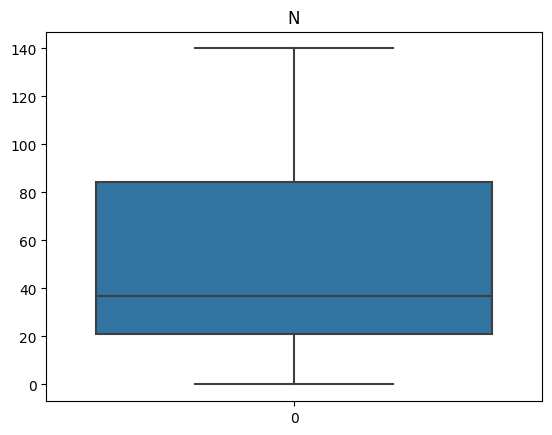

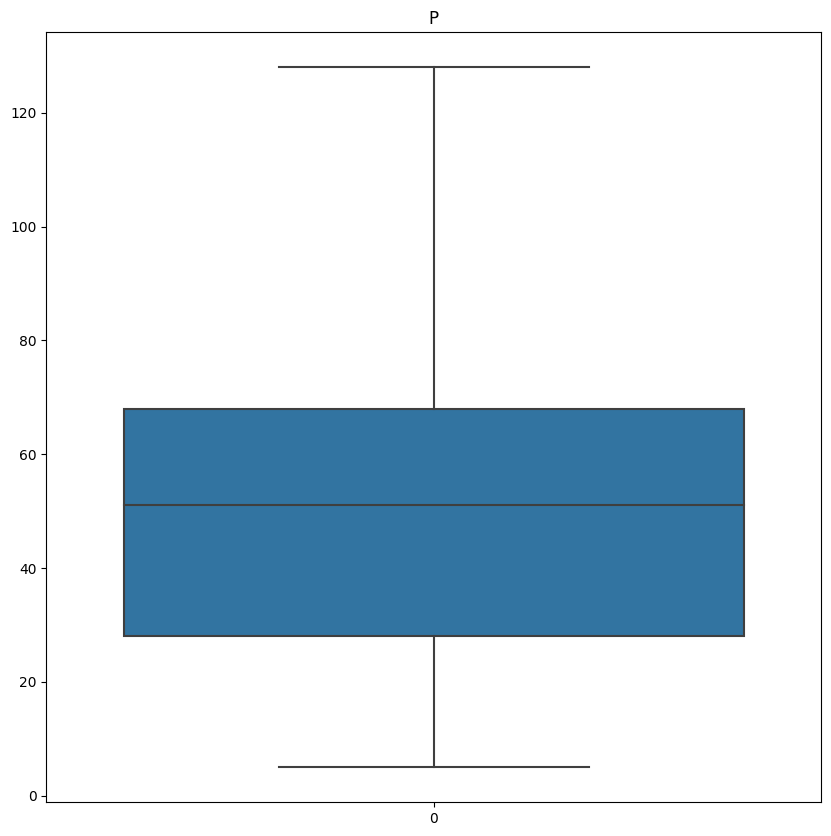

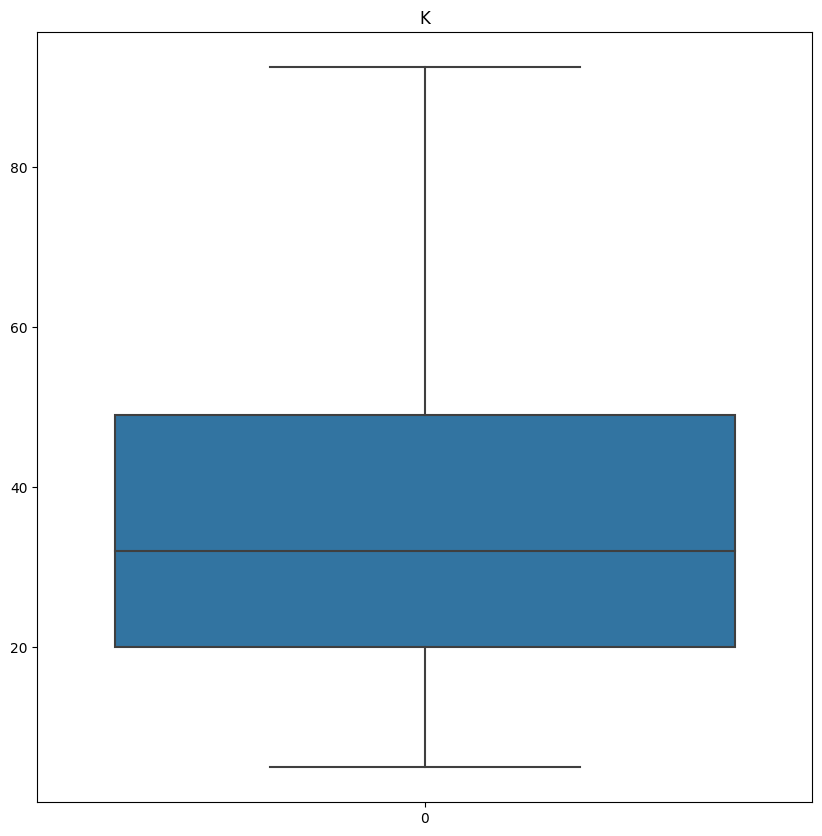

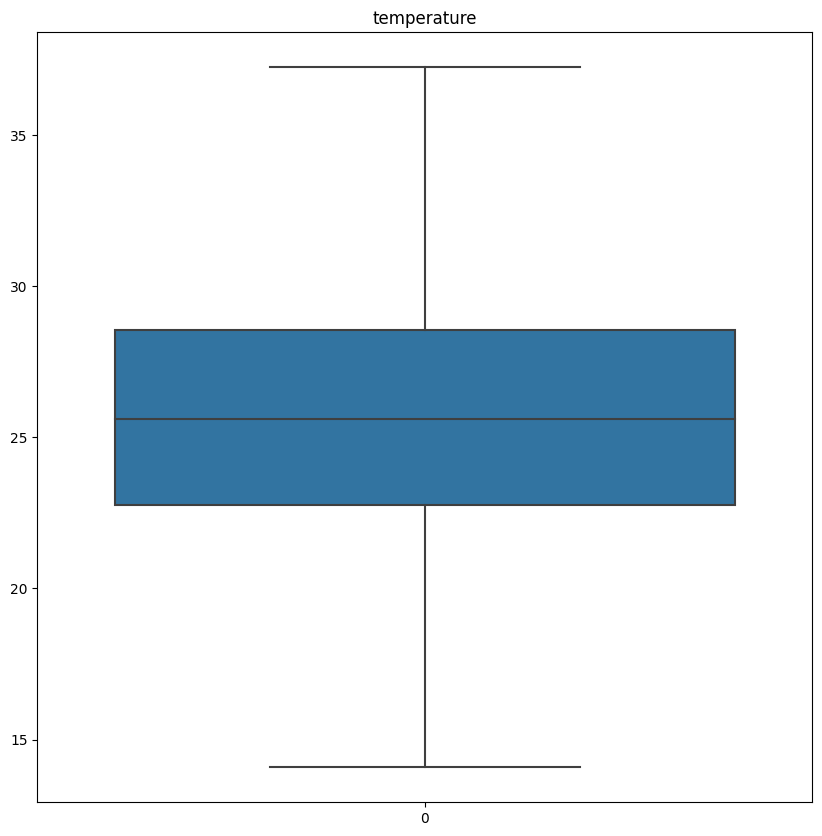

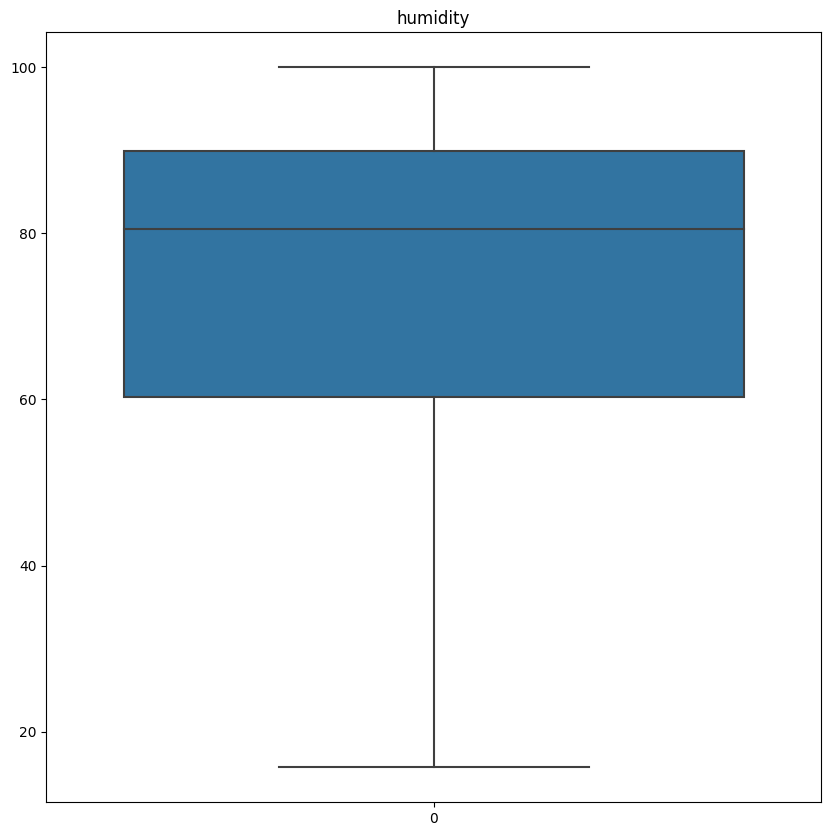

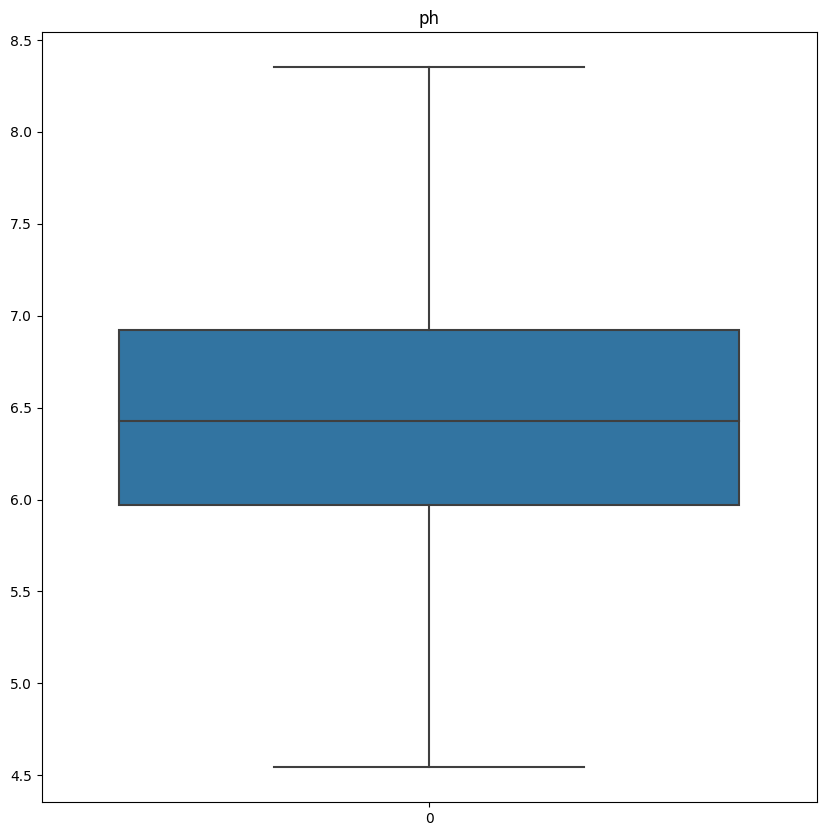

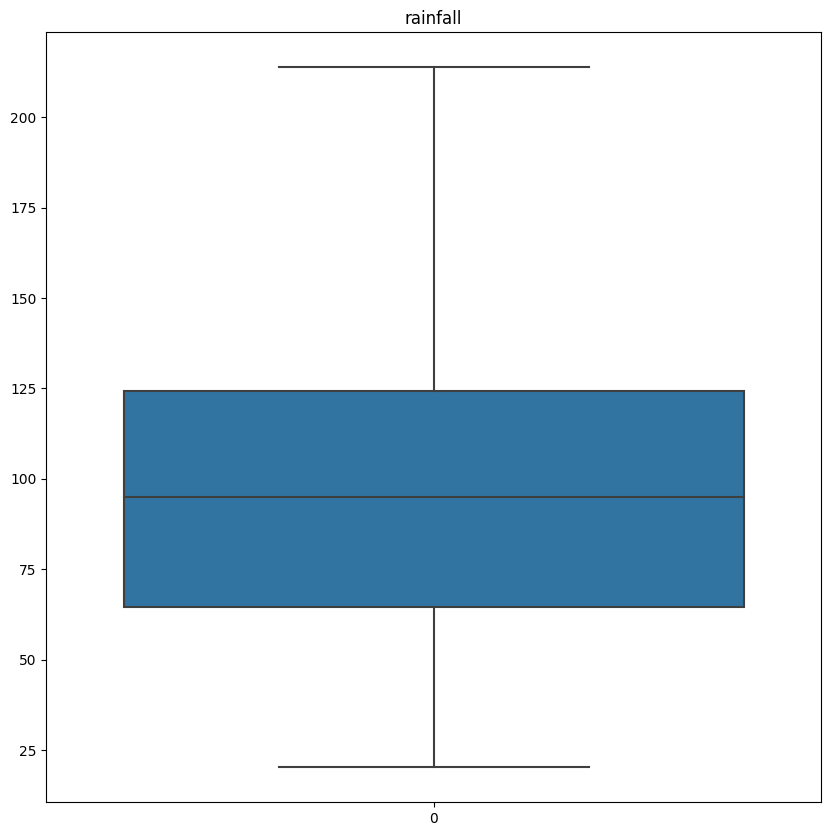

<Figure size 1000x1000 with 0 Axes>

In [31]:
for feature in continuous_feature:
    IQR(cropnew, feature)
    data=cropnew.copy()
    sns.boxplot(data=data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

In [32]:
cropnew.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,213.841241,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,213.841241,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,213.841241,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,213.841241,rice


In [33]:
features=cropnew[['N','P','K','temperature','humidity','ph','rainfall']]

In [34]:
target=cropnew['label']

In [35]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [36]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [39]:
X = cropnew.drop(["label"], axis=1)
Y = cropnew["label"]

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label_encoded_y,test_size = 0.2,random_state =2)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state =0)

In [42]:
acc=[]
modelname=[]

In [43]:
lg=LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=0)
lg.fit(Xtrain,Ytrain)

predicted_values1=lg.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values1))
print(accuracy_score(Ytest,predicted_values1))
print(classification_report(Ytest,predicted_values1))

x=accuracy_score(Ytest,predicted_values1)
acc.append(x)
modelname.append('Logistic Regression')

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  1  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [44]:
lg.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])

array(['coffee'], dtype=object)

In [45]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRNLogistic Regression.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(lg, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [47]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,Ytrain)

predicted_values2=dt.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values2))
print(accuracy_score(Ytest,predicted_values2))
print(classification_report(Ytest,predicted_values2))

x=accuracy_score(Ytest,predicted_values2)
acc.append(x)
modelname.append('Decision Tree')


[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  2  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [48]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRNDecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [49]:
rf = RandomForestClassifier(random_state=0)
rf.fit(Xtrain,Ytrain)

predicted_values3 = rf.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values3))
print(accuracy_score(Ytest,predicted_values3))
print(classification_report(Ytest,predicted_values3))

x=accuracy_score(Ytest,predicted_values3)
acc.append(x)
modelname.append('RandomForestClassifier')

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [50]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRNRandomForest.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,Ytrain)

predicted_values4 = nb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values4))
print(accuracy_score(Ytest,predicted_values4))
print(classification_report(Ytest,predicted_values4))

x=accuracy_score(Ytest,predicted_values4)
acc.append(x)
modelname.append('Guassian Naive Bayes')


[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [52]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRNGuassian Naive Bayes.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(nb, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [53]:
from sklearn.svm import SVC
svc1 = SVC(C= 500, gamma= 0.001, kernel= 'linear')
svc1.fit(Xtrain,Ytrain)

pred5=svc1.predict(Xtest)
print(confusion_matrix(Ytest,pred5))
print(accuracy_score(Ytest,pred5))
print(classification_report(Ytest,pred5))

x=accuracy_score(Ytest,pred5)
acc.append(x)
modelname.append('support Vector Machine')

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [2]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRNSupport Vector.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(svc1, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

NameError: name 'svc1' is not defined

In [55]:
features = cropnew[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = cropnew['label']
#features = cropnew[['temperature', 'humidity', 'ph', 'rainfall']]
labels =cropnew['label']

In [56]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [59]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [60]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label_encoded_y,test_size = 0.2,random_state =2)

In [61]:
from xgboost import XGBClassifier  
import xgboost 


In [62]:
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)

predicted_values6 = xgb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values6))
print(accuracy_score(Ytest,predicted_values6))
print(classification_report(Ytest,predicted_values6))

x=accuracy_score(Ytest,predicted_values6)
acc.append(x)
modelname.append('XGboost')


[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 25  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [63]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
filename = '../models/CRNXGBoost.pkl'
# Open the file to save as pkl file

pickle.dump(xgb, open(filename, "wb"))
xgb_model_loaded = pickle.load(open(filename, "rb"))
# Close the pickle instances
DT_Model_pkl.close()


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

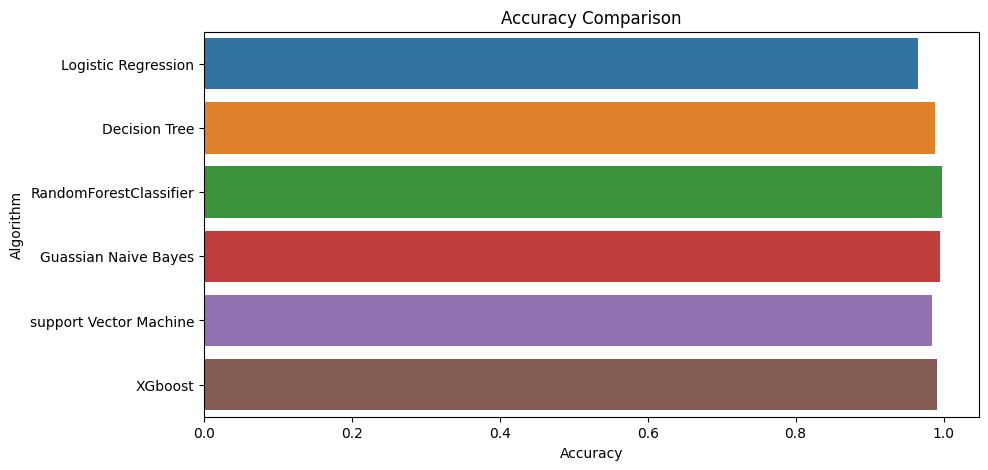

In [64]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = modelname)

In [65]:
accuracy_models = dict(zip(modelname, acc))
for k, v in accuracy_models.items():
    print (k, ':', v)

Logistic Regression : 0.9659090909090909
Decision Tree : 0.9886363636363636
RandomForestClassifier : 0.9977272727272727
Guassian Naive Bayes : 0.9954545454545455
support Vector Machine : 0.9840909090909091
XGboost : 0.990909090909091


In [66]:
data = np.array([[63.0,	42,	21.0,	23.262376,	72.331255,	5.798424,	67.102251	]])
prediction = svc1.predict(data)
print(prediction)

['maize']
